# Monte Carlo calculation of Pi

The classic introductory Monte Carlo problem, calculate Pi using random sampling of points inside a box of sidelength R in which a 1/4 circle of radius R fits.  The ratio of the number of points in the circle to the total number of points is related to Pi.

Learning points:
* Monte Carlo basics
* Python basics - numpy, plotting
* using Numba

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit

The @jit decorator in its simplest form means numba will compile the function at runtime and produce a much faster result compared to normal python

In [10]:

@jit
def pi_est(N):

    x_circle = []           #Creates a list to store x and y values in and out of the circle     
    y_circle = []
    x_square = []
    y_square = []

    M = 0
    
    for i in range(N):
        x = np.random.uniform(0.0, 1.0)   #Generate a pair of coordinates between -1 and 1 from the uniform distribution 
        y = np.random.uniform(0.0, 1.0)
 
        
        # check if inside or outside of circle
        if x**2 + y**2 <= 1:
            M += 1  
            x_circle.append(x)              
            y_circle.append(y) 
        else:
            x_square.append(x)             
            y_square.append(y)             
        
    pi_calc = (M/N) * 4
    return pi_calc, x_square, y_square, x_circle, y_circle
    

In [11]:
def plot_points(x_in, y_in, x_out, y_out):
    """ plot of points in and out """
    plt.clf()  # this clears any existing plots
    plt.scatter(x_in, y_in, c='b', marker='.')
    plt.scatter(x_out, y_out, c='m', marker='.')
    plt.show()
    

In [12]:
def plot_pi_n(n_val, pi_val):
    """ plot pi as function of n"""
    plt.clf() # this clears any existing plots
    plt.plot(n_val, pi_val)
    plt.axhline(y=np.pi, color='m')  # add horizontal line at pi
    plt.ylabel("pi estimate")
    plt.xlabel("N samples")
    plt.show()

10 2.8
10 3.6
10 3.2
10 2.8
10 4.0
100 3.0
100 3.32
100 3.36
100 3.16
100 3.36
500 3.216
500 3.256
500 3.192
500 3.224
500 3.064
1000 3.124
1000 3.068
1000 3.124
1000 3.12
1000 3.184
10000 3.124
10000 3.1604
10000 3.1424
10000 3.122
10000 3.1392
25000 3.14656
25000 3.11072
25000 3.14112
25000 3.14016
25000 3.15104
50000 3.13064
50000 3.14656
50000 3.13976
50000 3.14288
50000 3.15288
75000 3.12704
75000 3.1432
75000 3.1409066666666665
75000 3.14336
75000 3.149173333333333
100000 3.14144
100000 3.14144
100000 3.1442
100000 3.13784
100000 3.14088
10000000 3.1422324
10000000 3.1419324
10000000 3.1411524
10000000 3.140658
10000000 3.1402152


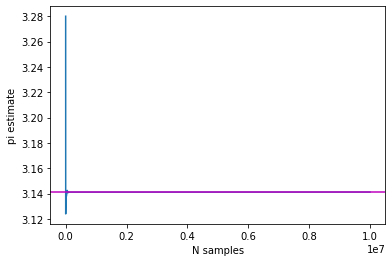

In [13]:
N_points=(10, 100, 500, 1000, 10000, 25000, 50000, 75000, 100000, 10000000) # tuple
pi_mean_vals = [] # list
standard_deviation = []
n_times = 5

for n in N_points:
    i = 0
    estimates = []
    while i < n_times:
        pi_val, x_in, y_in, x_out, y_out = pi_est(n)
        print(n, pi_val)
        estimates.append(pi_val)
        i = i + 1
    mean = np.mean(estimates)
    pi_mean_vals.append(mean)
    sd = np.std(estimates)
    standard_deviation.append(sd)
    
    


plot_pi_n(N_points, pi_mean_vals)